In [51]:
#import essential modules
import sys
import os
import numpy as np
import pandas as pd
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [56]:
#import local modules
sys.path.append(os.path.abspath(os.path.join('data')))
sys.path.insert(0,'../Scripts/')

from cleaner import DataCleaner
from data_information import DataInfo
from Data_logger import CreateLogger
from data_manipulation import DataManipulator
from Graphs import draw
from Results import result_picker
import matplotlib.pyplot as plt
from preview import DataPreview

In [30]:
#Loading the given data given
store_df=pd.read_csv('../data/store.csv')
train_df=pd.read_csv('../data/train.csv')
test_df=pd.read_csv('../data/test.csv')

#loading data generated on EDA
combined_df = pd.read_csv('../data/store_train_combined.csv')

In [31]:
#seeing the information by creating instances of the data given for further manipulation
store_data=DataInfo(store_df)
train_data=DataInfo(train_df)
test_data=DataInfo(test_df)
combined_data=DataInfo(combined_df)

res = result_picker()

## DATA INFORMATION

In [32]:
#Train data
train_data_info = DataInfo(train_df, deep=True)
train_data_info.get_information()

DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [33]:
#Test data
test_data_info = DataInfo(test_df, deep=True)
test_data_info.get_information()

DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [34]:
#Store data

store_data_info = DataInfo(store_df, deep=True)
store_data_info.get_information()

DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## MISSING VALUES

In [35]:
#missing values for the train data
missing_train = train_data_info.get_column_based_missing_percentage()
res.add_data('missing_data',missing_train)

missing_train

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


In [36]:
missing_test = test_data_info.get_column_based_missing_percentage()
res.add_data('missing_data',missing_test)

missing_test

,total_missing_values,missing_percentage
Id,0,0.0 %
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Open,11,0.03 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


#### Train and Test data has a compromizable (almost no) missing data

In [37]:
missing_store = store_data_info.get_column_based_missing_percentage()
res.add_data('missing_data',missing_test)

missing_store

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,3,0.27 %
CompetitionOpenSinceMonth,354,31.75 %
CompetitionOpenSinceYear,354,31.75 %
Promo2,0,0.0 %
Promo2SinceWeek,544,48.79 %
Promo2SinceYear,544,48.79 %
PromoInterval,544,48.79 %


## Cleaning Data

In [38]:
#creating a cleaner object for all data
train_data_cleaner = DataCleaner(train_df)
test_data_cleaner = DataCleaner(test_df)
store_data_cleaner=DataCleaner(store_df)


In [39]:
#changing the Date data type to datetime
train_data_cleaner.change_column_to_date_type('Date')
test_data_cleaner.change_column_to_date_type('Date')

train_data_cleaner.df.dtypes


Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [40]:
test_data_cleaner.df.dtypes

Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [41]:
#separating date column in to day , month and year columns
train_data_cleaner.separate_date_column(date_column='Date')
test_data_cleaner.separate_date_column(date_column='Date')

In [16]:
train_data_cleaner.df.dtypes

Store             int64
DayOfWeek         int64
Year              int64
Month             int64
Day               int64
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [17]:
test_data_cleaner.df.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Year               int64
Month              int64
Day                int64
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

## MERGING

In [18]:
merged_train_store_df = pd.merge(train_df, store_df, on=['Store'], how='inner')

In [19]:
merged_data_info = DataInfo(merged_train_store_df, deep=True)
merged_data_info.get_information()

DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Year                       1017209 non-null  int64         
 4   Month                      1017209 non-null  int64         
 5   Day                        1017209 non-null  int64         
 6   Sales                      1017209 non-null  int64         
 7   Customers                  1017209 non-null  int64         
 8   Open                       1017209 non-null  int64         
 9   Promo                      1017209 non-null  int64         
 10  StateHoliday               1017209 non-null  object        
 11  SchoolHoliday

In [20]:
merged_df=DataPreview(merged_train_store_df)


In [21]:
missing_merged = merged_data_info.get_column_based_missing_percentage()
res.add_data('missing_data',missing_merged)
missing_merged

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %


In [46]:
merged= merged_train_store_df.fillna(merged_train_store_df.median(), inplace = True)
merged=DataInfo(merged_train_store_df, deep=True)

In [49]:
missing_merged = merged.get_column_based_missing_percentage()
res.add_data('missing_data',missing_merged)
missing_merged


,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %


# Checking Outliers

<AxesSubplot:xlabel='Sales'>

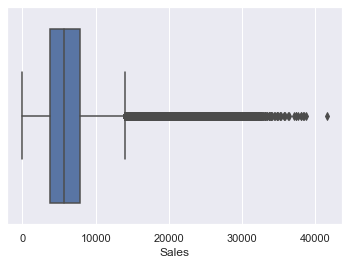

In [53]:
#sales outliers
sns.set()
sns.boxplot(data=merged_train_store_df,x='Sales')

<AxesSubplot:xlabel='Store'>

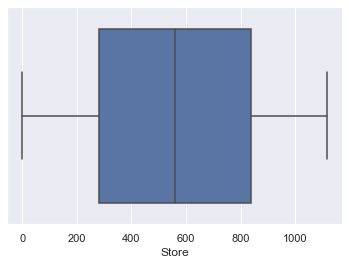

In [54]:
#merged outliers
sns.boxplot(data=merged_train_store_df,x='Store')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

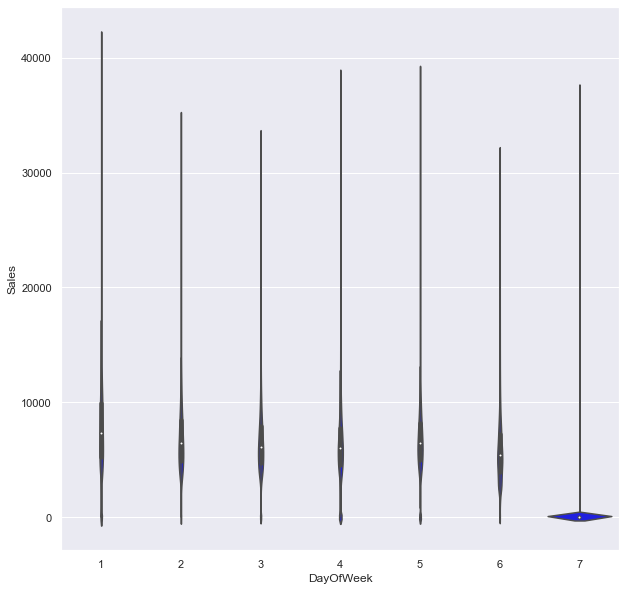

In [61]:
plt.figure(figsize=(10,10))
sns.set()
sns.violinplot(data=merged_train_store_df,x="DayOfWeek",y="Sales",color="blue")

In [63]:
#replace outliers
def replace_outlier_with_median(dataFrame: pd.DataFrame, feature: str) -> pd.DataFrame:

        Q1 = dataFrame[feature].quantile(0.25)
        Q3 = dataFrame[feature].quantile(0.75)
        median = dataFrame[feature].quantile(0.50)

        IQR = Q3 - Q1

        upper_whisker = Q3 + (1.5 * IQR)
        lower_whisker = Q1 - (1.5 * IQR)

        dataFrame[feature] = np.where(
            dataFrame[feature] > upper_whisker, median, dataFrame[feature])
        dataFrame[feature] = np.where(
            dataFrame[feature] < lower_whisker, median, dataFrame[feature])

        return dataFrame

In [64]:
replace_outlier_with_median(merged_train_store_df, 'Customers')
replace_outlier_with_median(merged_train_store_df, 'Sales')
merged_train_store_df.head()

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,31,5263.0,555.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,1,4,2015-07-30,2015,7,30,5020.0,546.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,1,3,2015-07-29,2015,7,29,4782.0,523.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,1,2,2015-07-28,2015,7,28,5011.0,560.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,1,1,2015-07-27,2015,7,27,6102.0,612.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


#### All missing values are filled

## Saving clean data

In [ ]:
merged_train_store_df.to_csv('../data/cleaner.csv')